* * *
<pre> NYU Paris            <i> Machine Learning - Summer 2023 </i></pre>
* * *


<h1 align="center"> Lab: the multilayer perceptron </h1>

<pre align="left"> June 07th 2023               <i> Author: Guillaume Staerman </i></pre>
* * *


##### Goal:
- Implement your Multilayer perceptron model

## Installing and importing Pytorch

In [1]:
import torch
from torchvision import datasets
from torchvision.transforms import ToTensor
device = torch.device("cuda" if torch.cuda.is_available() else "cpu") 

# Versions of torch and torchvision have to be compatible.
# check here: https://github.com/pytorch/pytorch/wiki/PyTorch-Versions

In [2]:
import torchvision

In [3]:
print(torch.__version__)
print(torchvision.__version__)

2.6.0+cu118
0.21.0+cu118


### Loading and preparing the MNIST dataset

In [4]:
# Define training and testing data using the functions in the cell above. 

train_data = datasets.MNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.MNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

## Question 1

### Visualize some elements of the dataset:

torch.Size([60000, 28, 28])
torch.Size([10000, 28, 28])


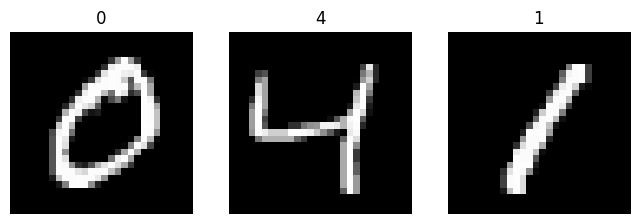

In [5]:
import matplotlib.pyplot as plt
# Visualize some images of the MNIST dataset
# Size of training data
print(train_data.data.shape)

# Size of testing data
print(test_data.data.shape)

labels_map = {
    0: "0",
    1: "1",
    2: "2",
    3: "3",
    4: "4",
    5: "5",
    6: "6",
    7: "7",
    8: "8",
    9: "9",
}

figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 1
for i in range(1, cols * rows + 1):
    sample_idx = i
    img, label = train_data[i]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [6]:
train_data.targets[0].item()

5

## Question 2

### Define a dataloader to construct a batch-wise iterator from your train/test data


In [7]:
from torch.utils.data import DataLoader

BATCH_SIZE = 4
trainloader = DataLoader(train_data, BATCH_SIZE)
testloader = DataLoader(test_data, BATCH_SIZE)

## Question 3

### Design your own Neural Network

In [8]:
import torch.nn as nn
import torch.nn.functional as F
# number of features (len of X cols)
input_dim = 28 * 28

# number of hidden layers
hidden_dim = 256

# number of classes (unique of y)
output_dim = 10

class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.linear1 = nn.Linear(input_dim, hidden_dim)
        self.linear2 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        h_relu = F.relu(self.linear1(x))
        y_pred = self.linear2(h_relu)
        return y_pred

## Question 4

### Train your neural network on the trainloader

In [9]:
from torch.nn.functional import nll_loss, cross_entropy
import torch.optim as optim

mlp = MLP().to(device)
print(mlp.parameters)

def NN(epochs=2, learning_rate=1e-6, criterion=cross_entropy):
    optimizer = optim.Adam(mlp.parameters(), lr=learning_rate)
    losses = []
    
    for t in range(epochs):
        for i, data in enumerate(trainloader):
            inputs, labels = data[0].to(device), data[1].to(device)  # Move to GPU
            
            optimizer.zero_grad()
            outputs = mlp(inputs.view(inputs.size(0), -1))  
            loss = criterion(outputs, labels)  
            
            loss.backward()
            optimizer.step()
            
            losses.append(loss.item())
            
            if not i % 2000:
                print(t, i, loss.item())
    return losses

losses=NN()

<bound method Module.parameters of MLP(
  (linear1): Linear(in_features=784, out_features=256, bias=True)
  (linear2): Linear(in_features=256, out_features=10, bias=True)
)>
0 0 2.2686829566955566
0 2000 2.1692471504211426
0 4000 2.219205379486084
0 6000 2.104391098022461
0 8000 2.079556941986084
0 10000 1.8818248510360718
0 12000 1.967896580696106
0 14000 2.007244348526001
1 0 1.8806045055389404
1 2000 1.3743712902069092
1 4000 1.7584779262542725
1 6000 1.6667139530181885
1 8000 1.6313519477844238
1 10000 1.2820366621017456
1 12000 1.5680605173110962
1 14000 1.6322970390319824


## Question 5

### Inspect the optimization procedure through the loss (plot the loss), what do you observe?

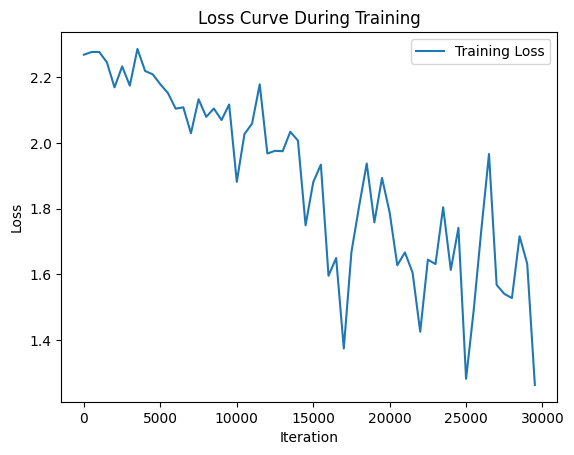

In [10]:
def plotter(losses):
    indices = range(0, len(losses), 500)  # Select every 500th point
    sampled_losses = [losses[i] for i in indices]  # Sample losses

    plt.plot(indices, sampled_losses, label="Training Loss")
    plt.xlabel("Iteration")
    plt.ylabel("Loss")
    plt.title("Loss Curve During Training")
    plt.legend()
    plt.show()
plotter(losses)

The loss curve shows an overall decreasing trend, indicating effective learning. However, there are fluctuations and sharp drops, likely due to batch variations, a high learning rate, or learning rate scheduling. The model hasn't fully converged yet, suggesting potential for further optimization.

## Question 6

### Evaluate the quality of your classifier on the test set

In [11]:
def accur(criterion=cross_entropy):
    size_test = test_data.data.shape[0]
    
    correct = 0
    for data in testloader:
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = mlp(inputs.view(inputs.size(0), -1))
        loss = criterion(outputs, labels)
        predicted = torch.argmax(outputs, dim=1)
        correct += (predicted == labels).sum()
    
    
    final_accuracy = correct / size_test
    
    print(final_accuracy)
accur()

tensor(0.8049, device='cuda:0')


## Question 7 (Bonus)

### Repeat this training with different loss (nll/cross_entropy...) and different number of epochs. What do you observe?

## Implementing Different Number of Epochs

Epoch number =  1
0 0 2.2700552940368652
0 2000 2.163407564163208
0 4000 2.2091469764709473
0 6000 2.1846182346343994
0 8000 2.084531545639038
0 10000 1.8672641515731812
0 12000 2.0467023849487305
0 14000 1.9947491884231567
tensor(0.7221, device='cuda:0')
Epoch number =  2
0 0 1.800954818725586
0 2000 1.2861785888671875
0 4000 1.7953743934631348
0 6000 1.7556431293487549
0 8000 1.5897597074508667
0 10000 1.2738325595855713
0 12000 1.6562318801879883
0 14000 1.6155563592910767
tensor(0.8041, device='cuda:0')
Epoch number =  3
0 0 1.359123706817627
0 2000 0.748134970664978
0 4000 1.4350361824035645
0 6000 1.3699606657028198
0 8000 1.1524754762649536
0 10000 0.8361109495162964
0 12000 1.3063172101974487
0 14000 1.2740375995635986
tensor(0.8271, device='cuda:0')
Epoch number =  4
0 0 1.0210412740707397
0 2000 0.447170227766037
0 4000 1.1827082633972168
0 6000 1.0760276317596436
0 8000 0.8346525430679321
0 10000 0.5507228374481201
0 12000 1.0334173440933228
0 14000 1.027818202972412
tensor(

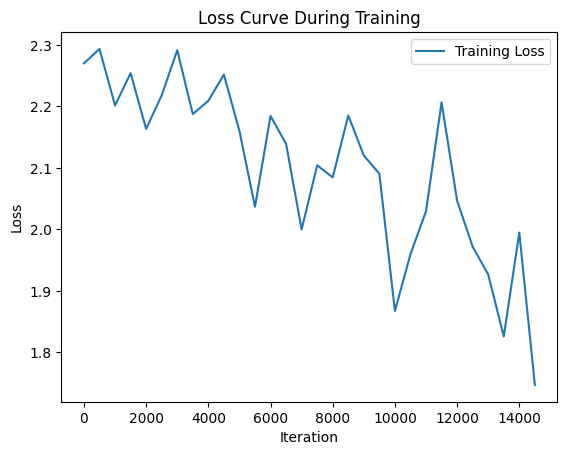

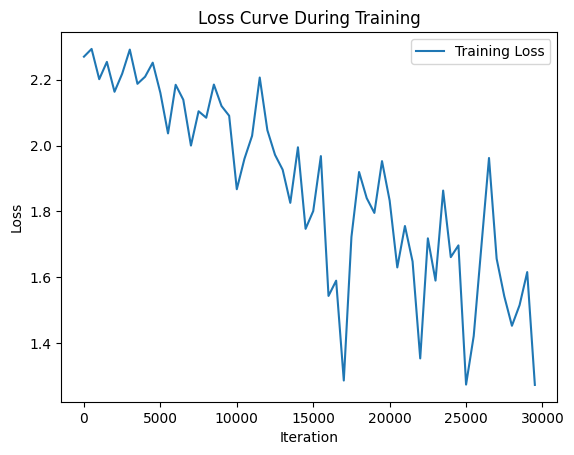

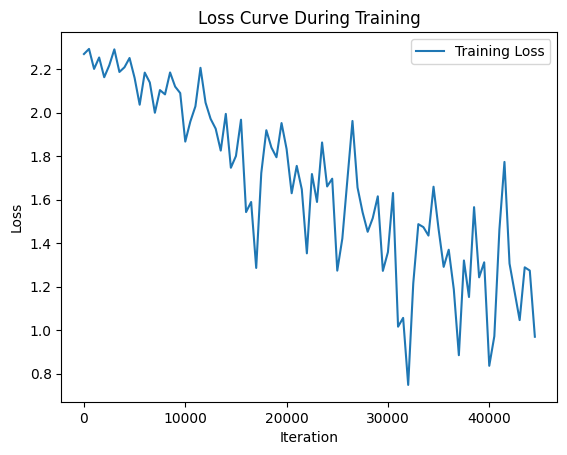

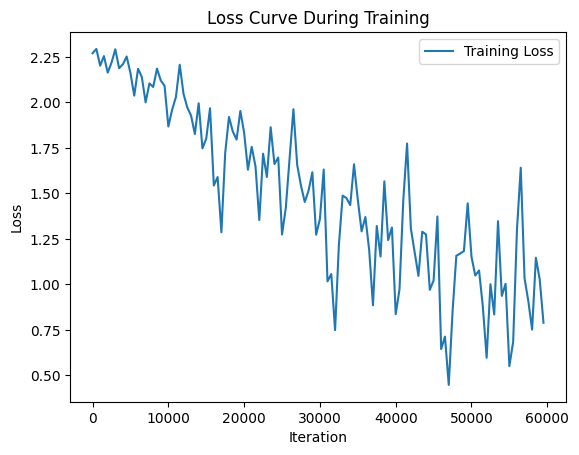

In [12]:
plotloss = [[]]
mlp = MLP().to(device)
for i in range(1, 5):
    print("Epoch number = ", i)
    losses = NN(epochs=1)
    accur()
    plotloss.append(plotloss[i-1] + losses)

for i in range(1,5):
    plotter(plotloss[i])


As the number of epochs increases, the model improves by adjusting its weights through optimization, gradually reducing the loss. With more epochs, the model sees more data and refines its predictions, leading to better performance. But this also means more computationally expensive.

## Implementing and Comparing Different Losses

nll_loss
0 0 -0.04737219959497452
0 2000 -0.31014710664749146
0 4000 -0.34723323583602905
0 6000 -0.5583606362342834
0 8000 -0.7110385298728943
0 10000 -1.2363274097442627
0 12000 -1.169541835784912
0 14000 -1.3684014081954956
1 0 -1.7492268085479736
1 2000 -3.622769355773926
1 4000 -2.9095141887664795
1 6000 -3.342738628387451
1 8000 -3.4184889793395996
1 10000 -4.823596954345703
1 12000 -4.46530294418335
1 14000 -4.746382236480713
tensor(0.3868, device='cuda:0')
cross_entropy
0 0 2.289618492126465
0 2000 2.223327875137329
0 4000 2.2376956939697266
0 6000 2.1466259956359863
0 8000 2.148531436920166
0 10000 1.8504416942596436
0 12000 2.004723310470581
0 14000 2.042454242706299
1 0 1.8312547206878662
1 2000 1.400144100189209
1 4000 1.841002106666565
1 6000 1.7508128881454468
1 8000 1.7081351280212402
1 10000 1.2607800960540771
1 12000 1.6312451362609863
1 14000 1.699202299118042
tensor(0.7985, device='cuda:0')


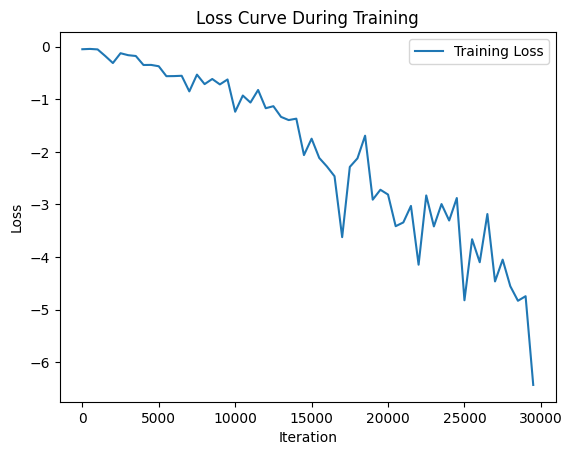

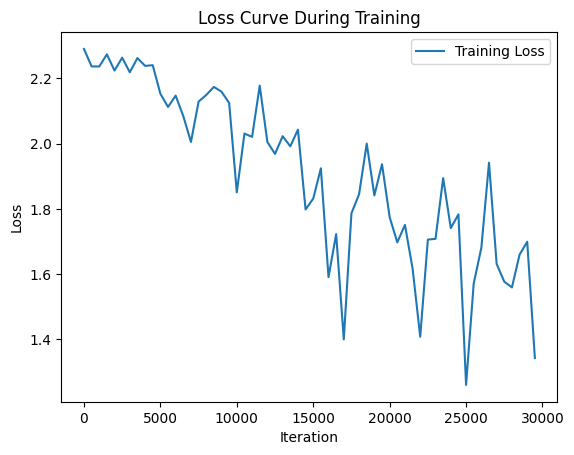

In [13]:
loss = [nll_loss, cross_entropy]
plotdiffloss=[]

for i, l in enumerate(loss):
    print(l.__name__)
    mlp = MLP().to(device)
    losses = NN(criterion=l)
    accur(criterion=l)
    plotdiffloss.append(losses)

for i in range(2):
    plotter(plotdiffloss[i])

With NLL Loss, the loss doesn't descend as quickly as in Cross-Entropy Loss. This results in a lower final accuracy.</br>

In contrast, Cross-Entropy Loss provides more stable training, leading to better convergence and a higher final accuracy. Cross-Entropy is more reliable and effective for this particular dataset.